# European Club data - Analysis of goals

Written report for this analysis can be found [here](../reports/club_01_goals_around_europe.md)

In [1]:
## our packaged code
from src import utilities

In [2]:
## suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy.stats import norm  
import numpy as np
import pandas as pd

In [4]:
## visualisation
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
# sns.set()
sns.set(rc={'figure.figsize':(10, 5)})

# from mpl_toolkits.basemap import Basemap

In [5]:
df = utilities.get_master("fulldata")

df = df[df.HomeAway == "Home"]

df.dropna(subset=['TotalGoals'], inplace=True)

df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df["Month"] = df["Date"].apply(lambda x: x.strftime("%m"))
df["Day_Of_Week"] = df["Date"].apply(lambda x: x.strftime("%w"))

attrib_cols = ["Date", "Month", "Day_Of_Week", "HomeAway", "Season", "Country", "Tier", "Team", "TeamOpp", "Manager", "ManagerOpp", "Referee", 
               "Stadium", "Latitude", "Longitude"]
metric_cols = ["TotalGoals"]

df = df[attrib_cols + metric_cols]

df.shape

(203194, 16)

In [6]:
df.describe(include="all").T.fillna("")

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,203194.0,6958,2019-08-31 00:00:00,197,1993-07-23 00:00:00,2020-11-30 00:00:00,,,,,,,
Month,203194.0,12,04,23184,,,,,,,,,
Day_Of_Week,203194.0,7,6,102781,,,,,,,,,
HomeAway,203194.0,1,Home,203194,,,,,,,,,
Season,203194.0,28,2018-2019,10223,,,,,,,,,
Country,203194.0,11,England,74934,,,,,,,,,
Tier,203194.0,,,,,,1.90274,1.13008,1,1,2,2,5
Team,203194.0,785,Watford,2258,,,,,,,,,
TeamOpp,203194.0,776,Watford,2233,,,,,,,,,
Manager,23605.0,164,Bryan Robson,679,,,,,,,,,


## Overall Trends

In [7]:
mean = df.TotalGoals.mean()
std = df.TotalGoals.std()
low = mean - std
high = mean + std

mean, std, low, high

(2.6246198214514207, 1.6572290068030846, 0.9673908146483361, 4.281848828254505)

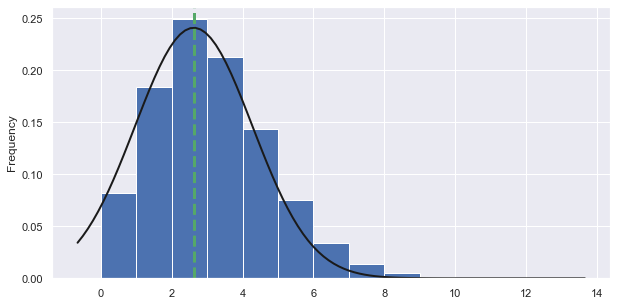

In [8]:
df.TotalGoals.plot(kind='hist', density=True, bins=range(int(df.TotalGoals.max()+1)))

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
# title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
# plt.title(title)

plt.axvline(x=mean, linewidth=3, color='g', linestyle="--", label="mu")

plt.savefig("../reports/figures/club_01_hist.PNG")
plt.show()


#######

          TotalGoals                                              
               count      mean       std  min  25%  50%  75%   max
Season                                                            
1993-1994     3346.0  2.643455  1.699524  0.0  1.0  2.0  4.0  11.0
1994-1995     4617.0  2.690492  1.718282  0.0  1.0  2.0  4.0  10.0
1995-1996     5103.0  2.658828  1.694471  0.0  1.0  2.0  4.0  11.0
1996-1997     5981.0  2.587862  1.702795  0.0  1.0  2.0  4.0  13.0
1997-1998     6733.0  2.624981  1.725868  0.0  1.0  2.0  4.0  11.0
1998-1999     6531.0  2.629613  1.682949  0.0  1.0  2.0  4.0  10.0
1999-2000     6532.0  2.657226  1.701303  0.0  1.0  2.0  4.0  12.0
2000-2001     6553.0  2.684725  1.694666  0.0  1.0  2.0  4.0  10.0
2001-2002     6473.0  2.662753  1.697212  0.0  1.0  2.0  4.0  11.0
2002-2003     4391.0  2.599408  1.655140  0.0  1.0  2.0  4.0  10.0
2003-2004     5267.0  2.644959  1.670326  0.0  1.0  2.0  4.0  10.0
2004-2005     5644.0  2.576187  1.665243  0.0  1.0  

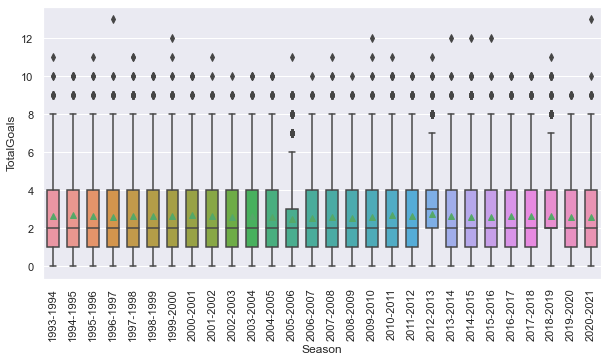


#######

      TotalGoals                                              
           count      mean       std  min  25%  50%  75%   max
Month                                                         
01       17842.0  2.567145  1.641348  0.0  1.0  2.0  4.0  11.0
02       21424.0  2.544716  1.628544  0.0  1.0  2.0  4.0  11.0
03       22432.0  2.552291  1.632483  0.0  1.0  2.0  4.0  11.0
04       23184.0  2.633368  1.648220  0.0  1.0  2.0  4.0  11.0
05       11837.0  2.858410  1.736841  0.0  2.0  3.0  4.0  12.0
06        1589.0  2.767778  1.721715  0.0  1.0  3.0  4.0  13.0
07        1345.0  2.570260  1.624224  0.0  1.0  2.0  4.0   9.0
08       17282.0  2.601666  1.630745  0.0  1.0  2.0  4.0  12.0
09       22124.0  2.631486  1.657143  0.0  1.0  2.0  4.0  10.0
10       22358.0  2.665310  1.680161  0.0  1.0  2.0  4.0  13.0
11       20949.0  2.659936  1.672335  0.0  1.0  2.0  4.0  10.0
12       20828.0  2.616478  1.653966  0.0  1.0  2.0  4.0  12.0


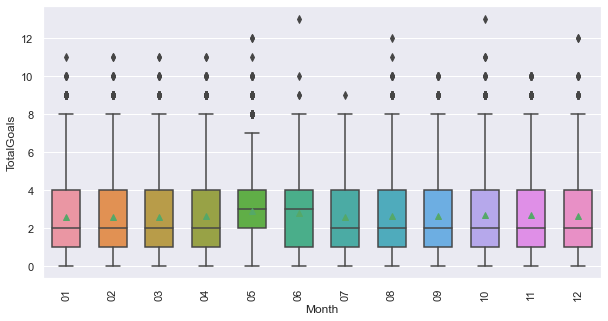


#######

            TotalGoals                                              
                 count      mean       std  min  25%  50%  75%   max
Day_Of_Week                                                         
0              51308.0  2.669701  1.698131  0.0  1.0  2.0  4.0  12.0
1               7841.0  2.533350  1.604423  0.0  1.0  2.0  4.0  10.0
2              16056.0  2.558171  1.611730  0.0  1.0  2.0  4.0  11.0
3               8763.0  2.608924  1.651253  0.0  1.0  2.0  4.0  13.0
4               1749.0  2.571184  1.599197  0.0  1.0  2.0  4.0   8.0
5              14696.0  2.526946  1.622094  0.0  1.0  2.0  4.0  11.0
6             102781.0  2.635672  1.652848  0.0  1.0  2.0  4.0  13.0


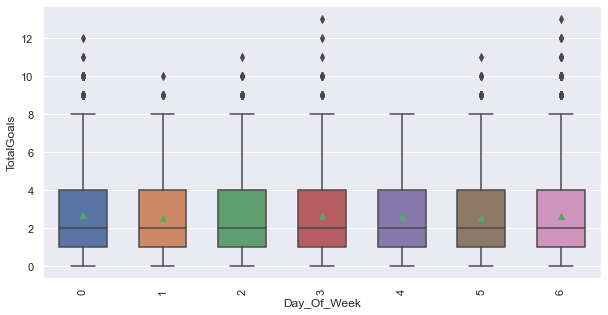


#######

         TotalGoals                                              
              count      mean       std  min  25%  50%  75%   max
Country                                                          
Belgium      6669.0  2.881841  1.739864  0.0  2.0  3.0  4.0  12.0
England     74934.0  2.601129  1.625235  0.0  1.0  2.0  4.0  11.0
France      18216.0  2.360507  1.561539  0.0  1.0  2.0  3.0  11.0
Germany     16143.0  2.809267  1.711031  0.0  2.0  3.0  4.0  13.0
Greece       6675.0  2.491536  1.635512  0.0  1.0  2.0  3.0  10.0
Holland      7989.0  3.075354  1.777518  0.0  2.0  3.0  4.0  13.0
Italy       18589.0  2.533541  1.626860  0.0  1.0  2.0  4.0  10.0
Portugal     7243.0  2.502692  1.614398  0.0  1.0  2.0  4.0  10.0
Scotland    17917.0  2.786069  1.690613  0.0  2.0  3.0  4.0  12.0
Spain       20992.0  2.510194  1.644387  0.0  1.0  2.0  3.0  12.0
Turkey       7827.0  2.784081  1.747149  0.0  2.0  3.0  4.0  11.0


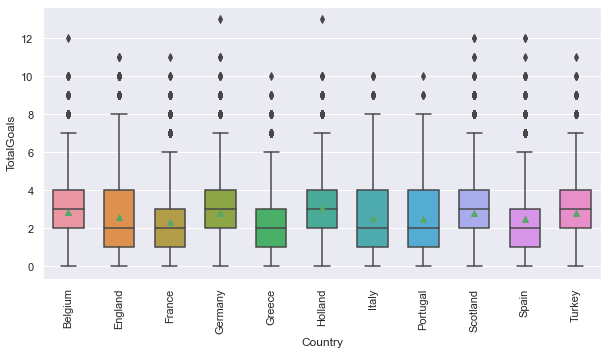


#######

     TotalGoals                                              
          count      mean       std  min  25%  50%  75%   max
Tier                                                         
1       97874.0  2.687813  1.686063  0.0  1.0  3.0  4.0  13.0
2       61774.0  2.499595  1.611747  0.0  1.0  2.0  3.0  13.0
3       17129.0  2.683052  1.634595  0.0  2.0  3.0  4.0  11.0
4       18268.0  2.628914  1.645041  0.0  1.0  2.0  4.0  11.0
5        8149.0  2.680942  1.669430  0.0  1.0  2.0  4.0  10.0


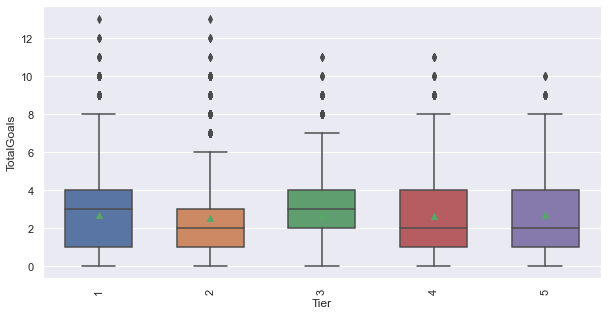

In [9]:
for col in ["Season", "Month", "Day_Of_Week", "Country", "Tier"]:
    print("\n#######\n")
    GpG = df[[col, "TotalGoals"]].groupby(col)
    print(GpG.describe(include="all"))
#     df[[col, "TotalGoals"]].boxplot(by=col, showmeans=True, widths=0.7, figsize=(10,5)).get_figure().gca().set_title("")
    sns.boxplot(x=col, y="TotalGoals", data=df.sort_values(by=col), showmeans=True, width=0.6)
    plt.xticks(rotation=90)
    
    plt.savefig("../reports/figures/club_01_boxplot_{0}.PNG".format(col))
    plt.show()
    

## Most and Fewest Goals


#######

Top 10 average goals by Team (minimum 30 matches)...
                  TotalGoals Variable
Team                                 
PSV Eindhoven       3.583710     Team
Ajax                3.542986     Team
Barcelona           3.509690     Team
Real Madrid         3.497099     Team
Alfreton Town       3.456522     Team
Bayern Munich       3.423841     Team
Sparta Rotterdam    3.326923     Team
Gretna              3.322222     Team
Reutlingen          3.317073     Team
FC Emmen            3.314286     Team


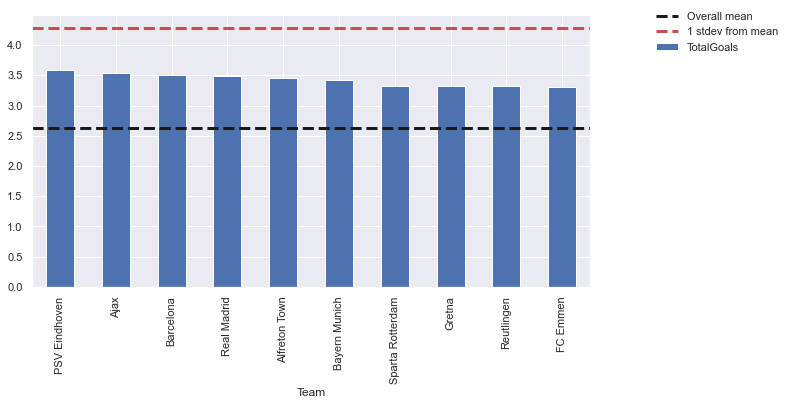

Bottom 10 average goals by Team (minimum 30 matches)...
               TotalGoals Variable
Team                              
Reus Deportiu    1.587302     Team
Badajoz          1.871212     Team
Lamia            1.905660     Team
Reggiana         1.946237     Team
Paris FC         1.986842     Team
Giannina         1.987342     Team
Monza            2.012500     Team
Louhans-Cuis.    2.016393     Team
Latina           2.023810     Team
Lucchese         2.026316     Team


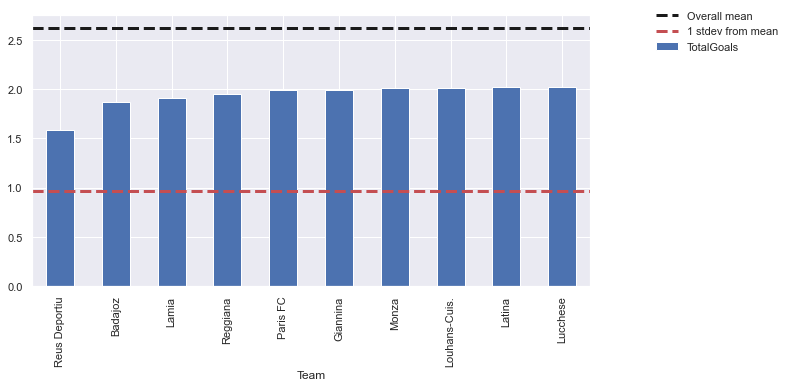


#######

Top 10 average goals by TeamOpp (minimum 30 matches)...
                TotalGoals Variable
TeamOpp                            
Erzurumspor       3.676471  TeamOpp
Kayseri           3.529412  TeamOpp
Roosendaal        3.514286  TeamOpp
A. Sebatspor      3.500000  TeamOpp
MVV Maastricht    3.494118  TeamOpp
Roda              3.470588  TeamOpp
Elazigspor        3.385965  TeamOpp
Ethnikos          3.382353  TeamOpp
Hyde United       3.347826  TeamOpp
Holstein Kiel     3.345455  TeamOpp


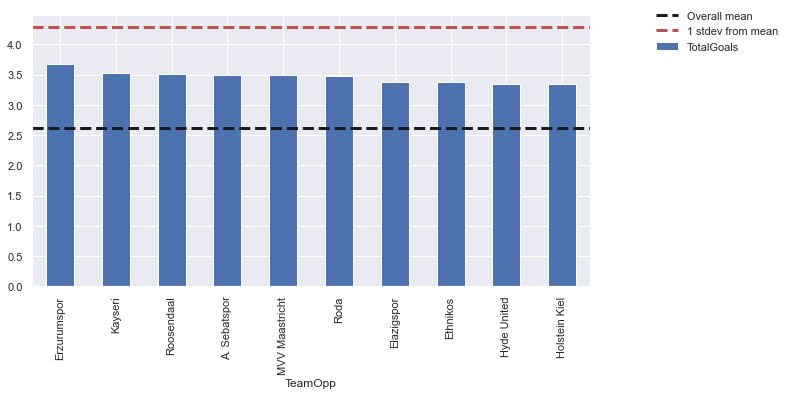

Bottom 10 average goals by TeamOpp (minimum 30 matches)...
               TotalGoals Variable
TeamOpp                           
Reus Deportiu    1.539683  TeamOpp
Orduspor         1.882353  TeamOpp
Arezzo           1.886364  TeamOpp
Badajoz          1.931818  TeamOpp
Tirsense         1.970588  TeamOpp
Red Star         2.000000  TeamOpp
Wasquehal        2.000000  TeamOpp
Leixoes          2.023810  TeamOpp
Merida           2.039604  TeamOpp
Lamia            2.041667  TeamOpp


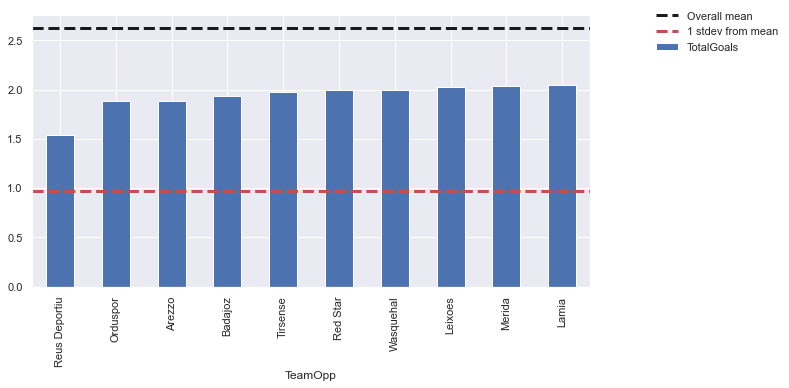


#######

Top 10 average goals by Manager (minimum 30 matches)...
                   TotalGoals Variable
Manager                               
Unai Emery           3.500000  Manager
Derek McInnes        3.250000  Manager
Dean Smith §         3.211268  Manager
André Villas-Boas    3.184953  Manager
Kit Symons           3.106977  Manager
Harry Redknapp       3.068182  Manager
Claudio Ranieri      3.067416  Manager
Dean Smith           3.063584  Manager
Stewart Houston      3.035494  Manager
Rafael Benítez       2.974895  Manager


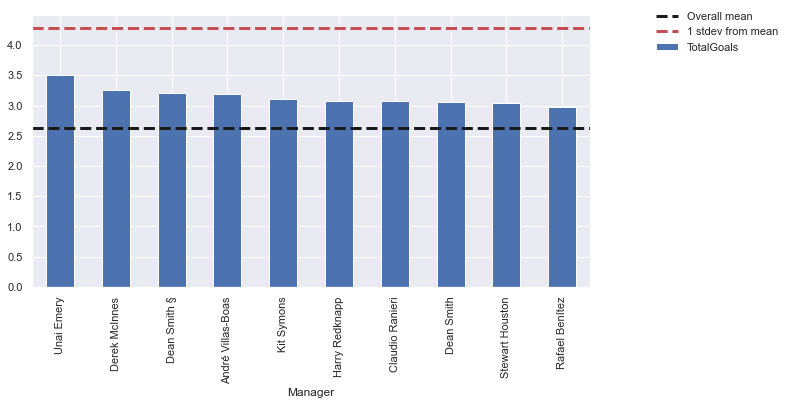

Bottom 10 average goals by Manager (minimum 30 matches)...
                   TotalGoals Variable
Manager                               
Gerhard Struber      1.589744  Manager
Jonathan Woodgate    1.625000  Manager
Steve Agnew          1.862069  Manager
Tony Pulis           1.987500  Manager
Aitor Karanka        2.009615  Manager
José Morais          2.140000  Manager
Gordon Strachan      2.142857  Manager
Roy Hodgson          2.146199  Manager
David O'Leary        2.214286  Manager
Gary Rowett          2.255814  Manager


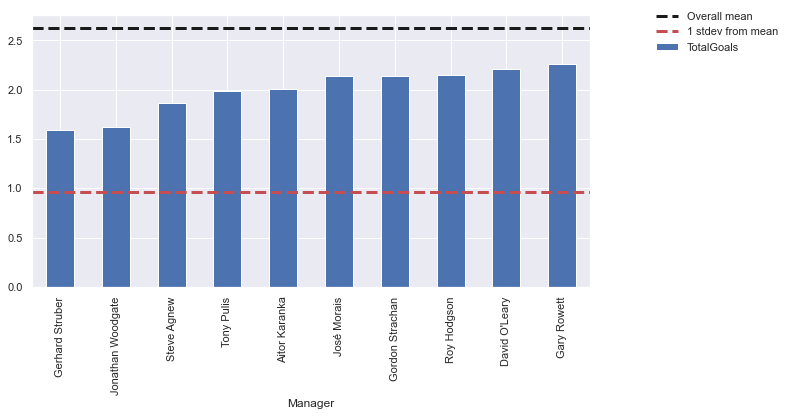


#######

Top 10 average goals by ManagerOpp (minimum 30 matches)...
                   TotalGoals    Variable
ManagerOpp                               
Malky Mackay         3.603774  ManagerOpp
Unai Emery           3.392157  ManagerOpp
Jaap Stam            3.380952  ManagerOpp
Carlo Ancelotti      3.352941  ManagerOpp
Claude Puel          3.305556  ManagerOpp
Ruud Gullit          3.093750  ManagerOpp
Eddie Howe           3.008357  ManagerOpp
Joe Kinnear          2.985149  ManagerOpp
Iain Dowie           2.944444  ManagerOpp
André Villas-Boas    2.913183  ManagerOpp


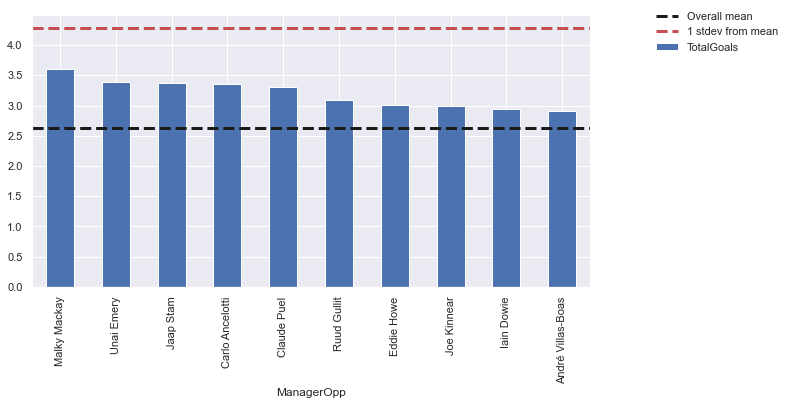

Bottom 10 average goals by ManagerOpp (minimum 30 matches)...
                     TotalGoals    Variable
ManagerOpp                                 
Mikel Arteta           1.857143  ManagerOpp
Brian Little           2.112903  ManagerOpp
Aitor Karanka          2.121951  ManagerOpp
Steve McClaren         2.185185  ManagerOpp
Avram Grant            2.212121  ManagerOpp
Roy Hodgson            2.215569  ManagerOpp
Dougie Freedman        2.216667  ManagerOpp
Ronald Koeman          2.235849  ManagerOpp
Mauricio Pochettino    2.236842  ManagerOpp
Gérard Houllier        2.239130  ManagerOpp


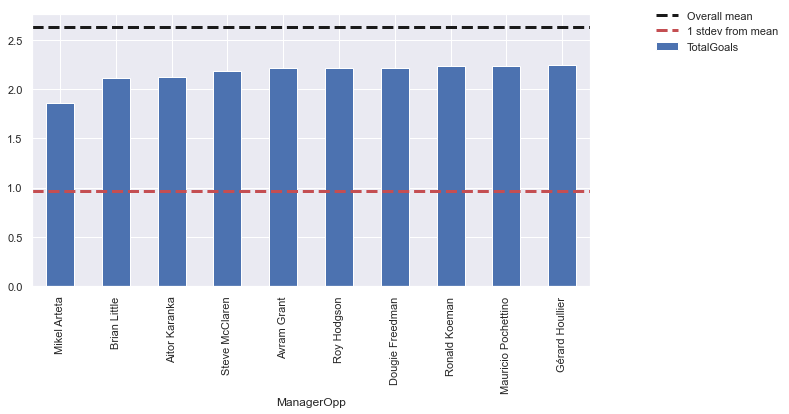


#######

Top 10 average goals by Stadium (minimum 30 matches)...
                     TotalGoals Variable
Stadium                                 
Camp Nou               3.509690  Stadium
Santiago Bernabéu      3.497099  Stadium
Allianz Arena          3.423841  Stadium
Weserstadion           3.131868  Stadium
BayArena               3.131579  Stadium
Galabank               3.116279  Stadium
Etihad Stadium         3.099398  Stadium
Celtic Park            3.091880  Stadium
Ibrox Stadium          3.086393  Stadium
Rhein-Neckar Arena     3.071111  Stadium


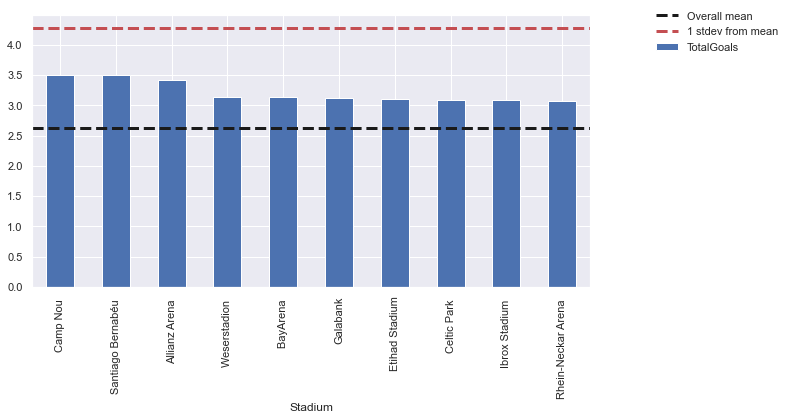

Bottom 10 average goals by Stadium (minimum 30 matches)...
                        TotalGoals Variable
Stadium                                    
Stade François Coty       2.148241  Stadium
Allianz Riviera           2.205821  Stadium
Stadium Municipal         2.210648  Stadium
Stade Marcel Picot        2.278960  Stadium
Riverside Stadium         2.280193  Stadium
Stade Francis-Le Blé      2.282895  Stadium
Stade de la Beaujoire     2.286307  Stadium
Oakwell                   2.291667  Stadium
Stade du Roudourou        2.296296  Stadium
Liberty Stadium           2.314204  Stadium


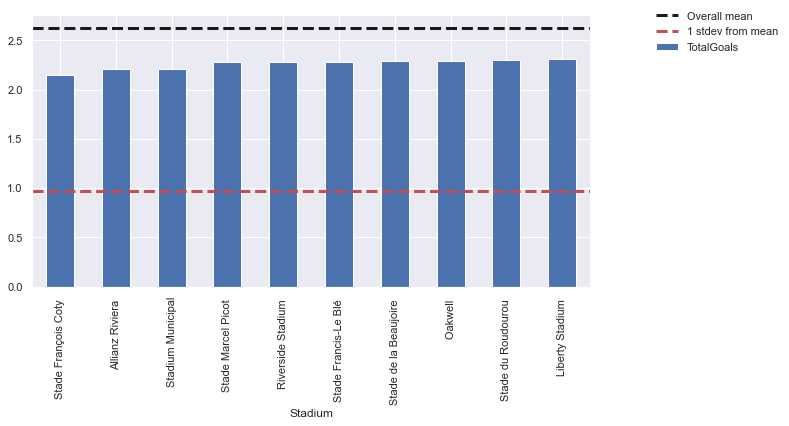


#######

Top 10 average goals by Referee (minimum 30 matches)...
              TotalGoals Variable
Referee                          
G Beaton        3.482759  Referee
J Oldham        3.372549  Referee
C Charleston    3.272727  Referee
A Freeland      3.267857  Referee
H Dallas        3.257143  Referee
G Ross          3.242424  Referee
R Johnson       3.162791  Referee
J Whiteley      3.137255  Referee
F Graham        3.127329  Referee
D Richardson    3.080645  Referee


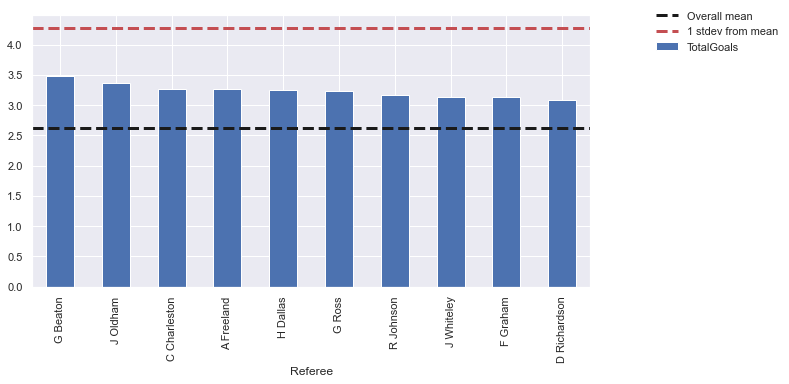

Bottom 10 average goals by Referee (minimum 30 matches)...
              TotalGoals Variable
Referee                          
G Cain          2.055556  Referee
O Yates         2.097744  Referee
S Creighton     2.104167  Referee
C Hatzidakis    2.138889  Referee
A Young         2.142857  Referee
C Harwood       2.162162  Referee
J P Robinson    2.181818  Referee
J Bell          2.193548  Referee
E Smith         2.200000  Referee
D Treleaven     2.215385  Referee


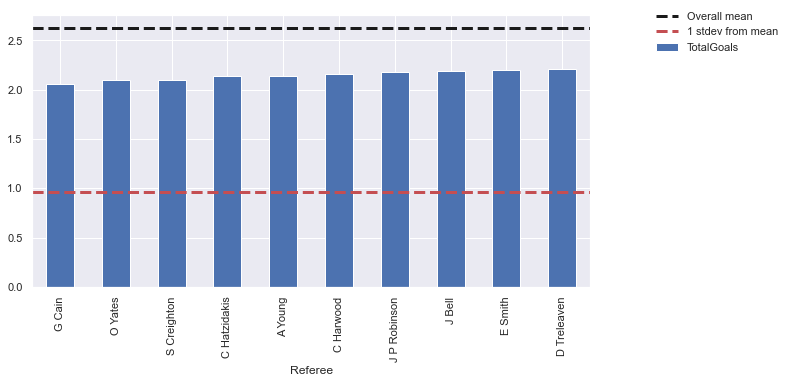

In [10]:
min_games = 30
top_n = 10

tops_list = []

for col in ["Team", "TeamOpp", "Manager", "ManagerOpp", "Stadium", "Referee"]:
    print("\n#######\n")
    for txt, asc, hilo in [("Top", False, high), ("Bottom", True, low)]:
        print("{0} {1} average goals by {2} (minimum {3} matches)...".format(txt, top_n, col, min_games))
        top = df[df[col].isin(df[col].value_counts()[df[col].value_counts() > min_games].index)].groupby(col).TotalGoals
        top = pd.DataFrame(top.mean().sort_values(ascending=asc).head(top_n))
        top["Variable"] = col
        tops_list.append(top)
        print(top)
        top.plot(kind="bar", figsize=(10,5))
        plt.xticks(rotation=90)
        plt.axhline(y=mean, linewidth=3, color='k', linestyle="--", label="Overall mean")
        plt.axhline(y=hilo, linewidth=3, color='r', linestyle="--", label="1 stdev from mean")
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()
    

                              TotalGoals
Value (Variable)                        
Erzurumspor (TeamOpp)           3.676471
Malky Mackay (ManagerOpp)       3.603774
PSV Eindhoven (Team)            3.583710
Ajax (Team)                     3.542986
Kayseri (TeamOpp)               3.529412
Roosendaal (TeamOpp)            3.514286
Barcelona (Team)                3.509690
Camp Nou  (Stadium)             3.509690
Unai Emery (Manager)            3.500000
A. Sebatspor (TeamOpp)          3.500000
Real Madrid (Team)              3.497099
Santiago Bernabéu  (Stadium)    3.497099
MVV Maastricht (TeamOpp)        3.494118
G Beaton (Referee)              3.482759
Roda (TeamOpp)                  3.470588
Alfreton Town (Team)            3.456522
Bayern Munich (Team)            3.423841
Allianz Arena  (Stadium)        3.423841
Unai Emery (ManagerOpp)         3.392157
Elazigspor (TeamOpp)            3.385965
Ethnikos (TeamOpp)              3.382353
Jaap Stam (ManagerOpp)          3.380952
J Oldham (Refere

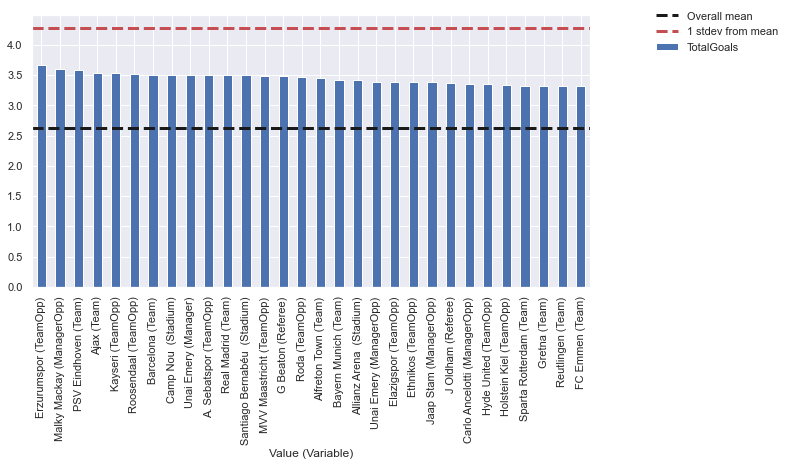

                             TotalGoals
Value (Variable)                       
Reus Deportiu (TeamOpp)        1.539683
Reus Deportiu (Team)           1.587302
Gerhard Struber (Manager)      1.589744
Jonathan Woodgate (Manager)    1.625000
Mikel Arteta (ManagerOpp)      1.857143
Steve Agnew (Manager)          1.862069
Badajoz (Team)                 1.871212
Orduspor (TeamOpp)             1.882353
Arezzo (TeamOpp)               1.886364
Lamia (Team)                   1.905660
Badajoz (TeamOpp)              1.931818
Reggiana (Team)                1.946237
Tirsense (TeamOpp)             1.970588
Paris FC (Team)                1.986842
Giannina (Team)                1.987342
Tony Pulis (Manager)           1.987500
Red Star (TeamOpp)             2.000000
Wasquehal (TeamOpp)            2.000000
Aitor Karanka (Manager)        2.009615
Monza (Team)                   2.012500
Louhans-Cuis. (Team)           2.016393
Leixoes (TeamOpp)              2.023810
Latina (Team)                  2.023810


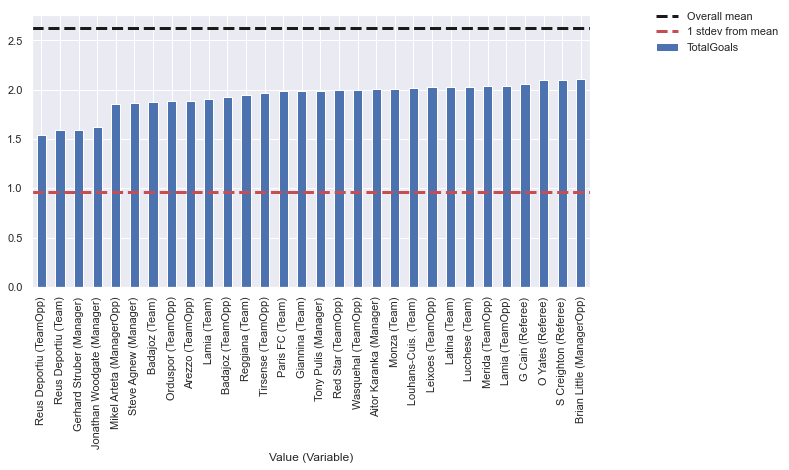

In [11]:
tops = pd.concat(tops_list, axis=0) #.sort_values(by="TotalGoals", ascending=False).head(30)
tops["Value (Variable)"] = tops.index + " (" + tops.Variable + ")"
tops.set_index("Value (Variable)", inplace=True)
tops.drop(columns="Variable", inplace=True)
# tops

# tops = pd.concat(tops_list, axis=0) #.sort_values(by="TotalGoals", ascending=False).head(30)
top_n = 30

for txt, asc, hilo in [("Top", False, high), ("Bottom", True, low)]:
#     print("{0} {1} average goals by {2} (minimum {3} matches)...".format(txt, top_n, col, min_games))
#     top = df[df[col].isin(df[col].value_counts()[df[col].value_counts() > min_games].index)].groupby(col).TotalGoals
#     top = pd.DataFrame(top.mean().sort_values(ascending=asc).head(top_n))
#     top["Variable"] = col
#     tops_list.append(top)
    tmp = tops.sort_values(by="TotalGoals", ascending=asc).head(top_n)
    print(tmp)
    tmp.plot(kind="bar", figsize=(10,5))
    plt.xticks(rotation=90)
    plt.axhline(y=mean, linewidth=3, color='k', linestyle="--", label="Overall mean")
    plt.axhline(y=hilo, linewidth=3, color='r', linestyle="--", label="1 stdev from mean")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    
    plt.savefig("../reports/figures/club_01_bar_{0}.PNG".format(txt), bbox_inches='tight')
    plt.show()
    

In [12]:
atts = ["Country", "Tier"]
for col in ["Manager", "ManagerOpp", "Stadium", "Referee", "Latitude", "Longitude"]:
#     for att in ["Country", "Tier"]:
    print("\n#######\n")
    print("Sample size and means with {0} by {1}".format(col, ", ".join(atts)))
    print(df.loc[pd.notnull(df[col]), ].groupby(atts).TotalGoals.agg(["size", "mean"]).sort_index())



#######

Sample size and means with Manager by Country, Tier
               size      mean
Country Tier                 
England 1     11215  2.619795
        2      9467  2.576423
        3      2379  2.550231
        4       544  2.591912

#######

Sample size and means with ManagerOpp by Country, Tier
               size      mean
Country Tier                 
England 1     11206  2.621542
        2      9486  2.591292
        3      2371  2.639814
        4       544  2.531250

#######

Sample size and means with Stadium by Country, Tier
                size      mean
Country  Tier                 
England  1     18512  2.630672
         2     20698  2.576771
         3     10430  2.591467
         4      7057  2.574607
         5      1005  2.766169
France   1      7804  2.421451
         2      3120  2.339423
Germany  1      6728  2.918549
         2      2439  2.717097
Scotland 1      5351  2.666417
         2      2820  2.706383
         3      1657  2.939650
         4      1

## Mapping Goals

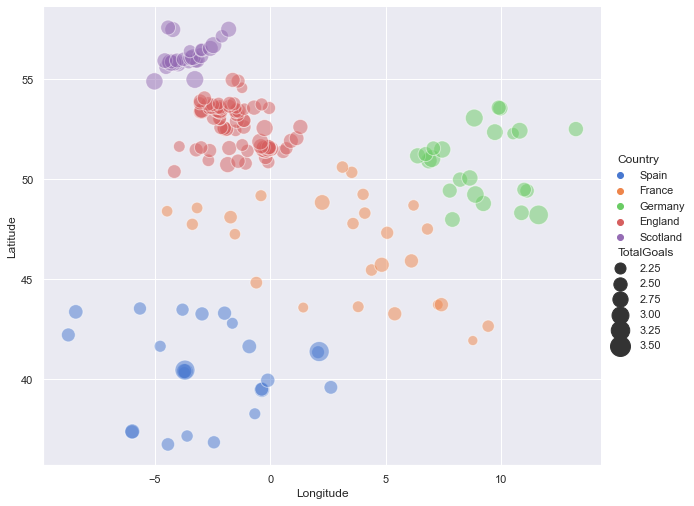

In [13]:
# mapdata=df.dropna(subset=['Latitude', 'Longitude'])
mapdata = df.dropna(subset=['Latitude', 'Longitude']).groupby(['Latitude', 'Longitude', 'Country']).TotalGoals\
    .mean().reset_index()

# fg = sns.FacetGrid(data=mapdata, hue='Country', height=6, aspect=.9)
# fg.map(plt.scatter, 'Longitude', 'Latitude').add_legend()

# sns.lmplot(x='Longitude', y='Latitude', s='TotalGoals', hue='Country', data=mapdata, fit_reg=False, 
#            x_jitter=0.1, y_jitter=0.1, markers="o", palette="viridis", height=7)

sns.relplot(x="Longitude", y="Latitude", hue="Country", size="TotalGoals",
            sizes=(100, 400), alpha=.5, palette="muted", aspect=1.2,
            height=7, data=mapdata)

plt.savefig("../reports/figures/club_01_map.PNG")

In [14]:
# # Extract the data we're interested in
# lat = df.groupby(['Stadium'])[["Latitude"]].max().values
# lon = df.groupby(['Stadium'])[["Longitude"]].max().values

# # print lat, lon

# # 1. Draw the map background
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution='h', 
#             lat_0=46., lon_0=-3.,
#             width=3E6, height=3E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
# m.drawcountries(color='black')

# # 2. scatter stadium data
# m.scatter(lon, lat, latlon=True,
#           color='r', s=40,
#           alpha=0.5)
